Aluno: Victor Afonso Bauler

# Enunciado - Trabalho 1

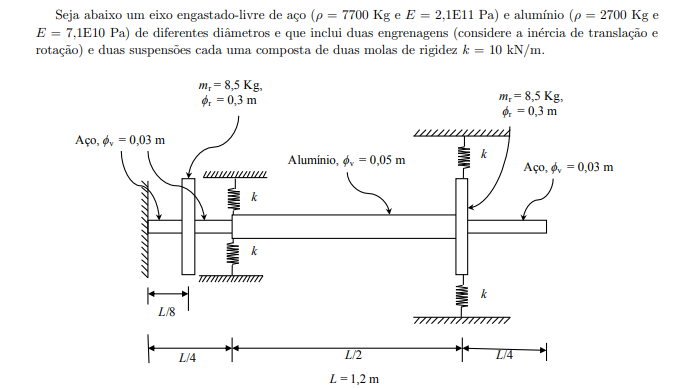

# Questão 1

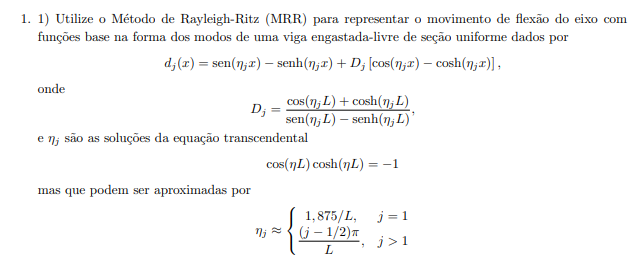


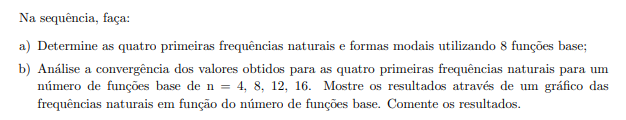

## Resolução

Para a solução do problema com o Método de Rayleigh-Ritz (MRR), serão adotados os seguintes passos:

1. Obtenção da matriz de rigidez e da matriz de massa, a partir das equações de energia, usando as funções de base previamente definidas;
2. Solução da equação do movimento via método modal;
3. Substituição dos coeficientes obtidos na equação do movimento, para obtenção da solução aproximada.


### 1. Obtenção das matrizes de rigidez e massa

#### Método de Rayleigh-Ritz

O Método de Rayleigh-Ritz aproxima a solução de $v(x,t)$ através de uma expansão na forma: $$v(x,t)=\sum _{j=1}^{N} d_{j}(x)q_j(t)$$
Em que: 
- $d_j(x)$ são as funções de base, previamente definidas;
- $q_j(t)$ são os coeficientes a serem determinados.

Dessa forma o MRR (Método de Rayleigh-Ritz) transforma um problema contínuo em um problema discreto com N graus de liberdade.

#### Equações de energia

O número finito de GL (graus de liberdade) permite a utilização das equações de Lagrange: 
$$\frac{d}{dt}\left(\frac{\partial T}{\partial \dot{q}_j}\right)+ \frac{\partial D}{\partial \dot{q}_j}+\frac{\partial U}{\partial q_j}=Q_j$$
Em que:
- $T$ é a energia cinética;
- $D$ é a energia dissipada;
- $U$ é a energia potencial;
- $Q_j$ é a força externa aplicada no grau de liberdade $j$;
- $q_j$ são as coordenadas generalizadas.

Ou pode-se utilizar diretamente as definições de energias na forma matricial:
$$T=\frac{1}{2}\{\dot{q} \}^T[M]\{\dot{q} \}$$
$$U=\frac{1}{2}\{q \}^T[K]\{q \}$$
$$\delta W=\{Q\}^T\{\delta q\}$$

Em que:
- $[M]$ é a matriz de massa;
- $[K]$ é a matriz de rigidez;
- $\{Q\}$ é o vetor de forças externas;
- $\delta W$ é o trabalho virtual.

##### Energia cinética

Como foi deduzido durante a disciplina, a energia cinética para uma viga em flexão é dada por:

$$T=\frac{1}{2}\int _{0}^{L} \rho A\left(\frac{\partial v}{\partial t}\right)^{2} dx$$

##### Energia potencial

Também foram feitas as deduções em aula de que a energia potencial é dada por:

$$U=\frac{1}{2}\int _{0}^{L} EI_z\left(\frac{\partial ^{2}v}{\partial x^{2}}\right)^{2} dx$$

##### Trabalho Virtual

O trabalho virtual é dado por:

$$\delta W=\int _{0}^{L} F_y \delta v \ dx$$


#### Matrizes de rigidez e massa

Substituindo a expansão de $v(x,t)$ nas equações de energia para obtenção das matrizes de rigidez e massa, tem-se:

$$M_{jk}=\int _{0}^{L} \rho A \ d_j(x)  d_k(x) \ dx$$

$$K_{jk}=\int _{0}^{L} EI_z \ d_j^{''}(x)  d_k^{''}(x) \ dx$$

$$Q_j=\int _{0}^{L} F_y d_j(x) \ dx$$

### 2. Solução da equação do movimento via método modal

Com as matrizes de rigidez e massa obtidas, é possível resolver a equação do movimento:

$$[M]\{\ddot{q}\}+[K]\{q\}=\{Q\}$$

No caso de solução via método modal, o problema de Autovalor fica:

$$([K]-\omega^2[M])\{a\}=\{0\}$$

Tal que:
- $w_n^2$ são os autovalores;
- $a_n$ são os autovetores.

E as autofunções em termos de $v(x,t)$ são dadas por:

$$u_n(x)=\{d(x)\}^T\{a_n\}$$



## Implementação no Python

### Importando bibliotecas necessárias
- Será feito para ambas implementações do MRR e do FEM (Finite Element Method)

In [99]:
import numpy as np
import sympy as sp

from IPython.display import display

### Definindo funções de base

Utilizando a biblioteca SymPy

In [100]:
x, eta_j, L, rho, A, j, D_j, E, I_z, d_j, k, F_y = sp.symbols('x \eta_j L \\rho A j D_j E I_z d_j k F_y')

eta_j = sp.Equality(eta_j, sp.Piecewise((1.875/L, sp.Eq(j, 1)), ((j-1/2)*sp.pi/L, j > 1)))
eta_k = sp.Piecewise((1.875/L, sp.Eq(k, 1)), ((k-1/2)*sp.pi/L, k > 1))

display(eta_j)

D_j = sp.Eq(D_j, (sp.cos(eta_j.lhs*L)+sp.cosh(eta_j.lhs*L))/(sp.sin(eta_j.lhs*L)-sp.sinh(eta_j.lhs*L)))
display(D_j)
D_j = sp.Eq(D_j.lhs, (sp.cos(eta_j.rhs*L)+sp.cosh(eta_j.rhs*L))/(sp.sin(eta_j.rhs*L)-sp.sinh(eta_j.rhs*L)))
D_k = (sp.cos(eta_k*L)+sp.cosh(eta_k*L))/(sp.sin(eta_k*L)-sp.sinh(eta_k*L))

d_j = sp.Eq(d_j, sp.sin(eta_j.lhs*x) - sp.sinh(eta_j.lhs*x) + D_j.lhs*(sp.cos(eta_j.lhs*x) - sp.cosh(eta_j.lhs*x)))
display(d_j)
d_j = sp.Eq(d_j.lhs, sp.sin(eta_j.rhs*x) - sp.sinh(eta_j.rhs*x) + D_j.rhs*(sp.cos(eta_j.rhs*x) - sp.cosh(eta_j.rhs*x)))
d_k = sp.sin(eta_k*x) - sp.sinh(eta_k*x) + D_k*(sp.cos(eta_k*x) - sp.cosh(eta_k*x))



Eq(\eta_j, Piecewise((1.875/L, Eq(j, 1)), (pi*(j - 0.5)/L, j > 1)))

Eq(D_j, (cos(L*\eta_j) + cosh(L*\eta_j))/(sin(L*\eta_j) - sinh(L*\eta_j)))

Eq(d_j, D_j*(cos(\eta_j*x) - cosh(\eta_j*x)) + sin(\eta_j*x) - sinh(\eta_j*x))

### Obtenção das matris de rigidez e massa

In [101]:
M_jk = sp.Integral(rho*A*d_j.rhs*d_k, (x, 0, L))
display(M_jk)

K_jk = sp.Integral(E*I_z*sp.diff(d_j.rhs, x, 2)*sp.diff(d_k, x, 2), (x, 0, L))
display(K_jk)

Q_j = sp.Integral(F_y*d_j.rhs, (x, 0, L))
display(Q_j)

Integral(A*\rho*(sin(x*Piecewise((1.875/L, Eq(j, 1)), (pi*(j - 0.5)/L, j > 1))) - sinh(x*Piecewise((1.875/L, Eq(j, 1)), (pi*(j - 0.5)/L, j > 1))) + (cos(L*Piecewise((1.875/L, Eq(j, 1)), (pi*(j - 0.5)/L, j > 1))) + cosh(L*Piecewise((1.875/L, Eq(j, 1)), (pi*(j - 0.5)/L, j > 1))))*(cos(x*Piecewise((1.875/L, Eq(j, 1)), (pi*(j - 0.5)/L, j > 1))) - cosh(x*Piecewise((1.875/L, Eq(j, 1)), (pi*(j - 0.5)/L, j > 1))))/(sin(L*Piecewise((1.875/L, Eq(j, 1)), (pi*(j - 0.5)/L, j > 1))) - sinh(L*Piecewise((1.875/L, Eq(j, 1)), (pi*(j - 0.5)/L, j > 1)))))*(sin(x*Piecewise((1.875/L, Eq(k, 1)), (pi*(k - 0.5)/L, k > 1))) - sinh(x*Piecewise((1.875/L, Eq(k, 1)), (pi*(k - 0.5)/L, k > 1))) + (cos(L*Piecewise((1.875/L, Eq(k, 1)), (pi*(k - 0.5)/L, k > 1))) + cosh(L*Piecewise((1.875/L, Eq(k, 1)), (pi*(k - 0.5)/L, k > 1))))*(cos(x*Piecewise((1.875/L, Eq(k, 1)), (pi*(k - 0.5)/L, k > 1))) - cosh(x*Piecewise((1.875/L, Eq(k, 1)), (pi*(k - 0.5)/L, k > 1))))/(sin(L*Piecewise((1.875/L, Eq(k, 1)), (pi*(k - 0.5)/L, k > 1))) 

Integral(E*I_z*(sin(x*Piecewise((1.875/L, Eq(j, 1)), (pi*(j - 0.5)/L, j > 1))) + sinh(x*Piecewise((1.875/L, Eq(j, 1)), (pi*(j - 0.5)/L, j > 1))) + (cos(L*Piecewise((1.875/L, Eq(j, 1)), (pi*(j - 0.5)/L, j > 1))) + cosh(L*Piecewise((1.875/L, Eq(j, 1)), (pi*(j - 0.5)/L, j > 1))))*(cos(x*Piecewise((1.875/L, Eq(j, 1)), (pi*(j - 0.5)/L, j > 1))) + cosh(x*Piecewise((1.875/L, Eq(j, 1)), (pi*(j - 0.5)/L, j > 1))))/(sin(L*Piecewise((1.875/L, Eq(j, 1)), (pi*(j - 0.5)/L, j > 1))) - sinh(L*Piecewise((1.875/L, Eq(j, 1)), (pi*(j - 0.5)/L, j > 1)))))*(sin(x*Piecewise((1.875/L, Eq(k, 1)), (pi*(k - 0.5)/L, k > 1))) + sinh(x*Piecewise((1.875/L, Eq(k, 1)), (pi*(k - 0.5)/L, k > 1))) + (cos(L*Piecewise((1.875/L, Eq(k, 1)), (pi*(k - 0.5)/L, k > 1))) + cosh(L*Piecewise((1.875/L, Eq(k, 1)), (pi*(k - 0.5)/L, k > 1))))*(cos(x*Piecewise((1.875/L, Eq(k, 1)), (pi*(k - 0.5)/L, k > 1))) + cosh(x*Piecewise((1.875/L, Eq(k, 1)), (pi*(k - 0.5)/L, k > 1))))/(sin(L*Piecewise((1.875/L, Eq(k, 1)), (pi*(k - 0.5)/L, k > 1))) -

Integral(F_y*(sin(x*Piecewise((1.875/L, Eq(j, 1)), (pi*(j - 0.5)/L, j > 1))) - sinh(x*Piecewise((1.875/L, Eq(j, 1)), (pi*(j - 0.5)/L, j > 1))) + (cos(L*Piecewise((1.875/L, Eq(j, 1)), (pi*(j - 0.5)/L, j > 1))) + cosh(L*Piecewise((1.875/L, Eq(j, 1)), (pi*(j - 0.5)/L, j > 1))))*(cos(x*Piecewise((1.875/L, Eq(j, 1)), (pi*(j - 0.5)/L, j > 1))) - cosh(x*Piecewise((1.875/L, Eq(j, 1)), (pi*(j - 0.5)/L, j > 1))))/(sin(L*Piecewise((1.875/L, Eq(j, 1)), (pi*(j - 0.5)/L, j > 1))) - sinh(L*Piecewise((1.875/L, Eq(j, 1)), (pi*(j - 0.5)/L, j > 1))))), (x, 0, L))

### a)

Com 8 funções de base:

In [123]:
M = sp.Matrix.zeros(8, 8)
K = sp.Matrix.zeros(8, 8)
Q = sp.Matrix.zeros(8, 1)
for i in range(8):
    for k_ in range(8):
        M[i, k_] = M_jk.subs({j: i+1, k: k_+1})
        K[i, k_] = K_jk.subs({j: i+1, k: k_+1})

    Q[i, 0] = Q_j.subs({j: i+1})

display(M[:, 0])

display(K[:, 0])

display(Q)

Matrix([
[                                                                                           Integral(A*\rho*(1.85599129896753*(0.73402699497533*sin(1.875*x/L) - cos(1.875*x/L) - 0.73402699497533*sinh(1.875*x/L) + cosh(1.875*x/L))**2), (x, 0, L))],
[  Integral(A*\rho*((cos(3*pi*x/(2*L)) - cosh(1.5*pi*x/L))*cosh(1.5*pi)/(-sinh(1.5*pi) - 1) + sin(3*pi*x/(2*L)) - sinh(1.5*pi*x/L))*(sin(1.875*x/L) - 1.3623477158815*cos(1.875*x/L) - sinh(1.875*x/L) + 1.3623477158815*cosh(1.875*x/L)), (x, 0, L))],
[   Integral(A*\rho*((cos(5*pi*x/(2*L)) - cosh(2.5*pi*x/L))*cosh(2.5*pi)/(1 - sinh(2.5*pi)) + sin(5*pi*x/(2*L)) - sinh(2.5*pi*x/L))*(sin(1.875*x/L) - 1.3623477158815*cos(1.875*x/L) - sinh(1.875*x/L) + 1.3623477158815*cosh(1.875*x/L)), (x, 0, L))],
[  Integral(A*\rho*((cos(7*pi*x/(2*L)) - cosh(3.5*pi*x/L))*cosh(3.5*pi)/(-sinh(3.5*pi) - 1) + sin(7*pi*x/(2*L)) - sinh(3.5*pi*x/L))*(sin(1.875*x/L) - 1.3623477158815*cos(1.875*x/L) - sinh(1.875*x/L) + 1.3623477158815*cosh(1.875*x/L)), (x, 0, L))],

Matrix([
[                                                                                              Integral(12.359619140625*E*I_z*(1.85599129896753*(0.73402699497533*sin(1.875*x/L) - cos(1.875*x/L) + 0.73402699497533*sinh(1.875*x/L) - cosh(1.875*x/L))**2)/L**4, (x, 0, L))],
[    Integral(7.91015625*pi**2*E*I_z*((cos(3*pi*x/(2*L)) + cosh(1.5*pi*x/L))*cosh(1.5*pi)/(-sinh(1.5*pi) - 1) + sin(3*pi*x/(2*L)) + sinh(1.5*pi*x/L))*(sin(1.875*x/L) - 1.3623477158815*cos(1.875*x/L) + sinh(1.875*x/L) - 1.3623477158815*cosh(1.875*x/L))/L**4, (x, 0, L))],
[    Integral(21.97265625*pi**2*E*I_z*((cos(5*pi*x/(2*L)) + cosh(2.5*pi*x/L))*cosh(2.5*pi)/(1 - sinh(2.5*pi)) + sin(5*pi*x/(2*L)) + sinh(2.5*pi*x/L))*(sin(1.875*x/L) - 1.3623477158815*cos(1.875*x/L) + sinh(1.875*x/L) - 1.3623477158815*cosh(1.875*x/L))/L**4, (x, 0, L))],
[   Integral(43.06640625*pi**2*E*I_z*((cos(7*pi*x/(2*L)) + cosh(3.5*pi*x/L))*cosh(3.5*pi)/(-sinh(3.5*pi) - 1) + sin(7*pi*x/(2*L)) + sinh(3.5*pi*x/L))*(sin(1.875*x/L) - 1.36234771

Matrix([
[             Integral(F_y*(sin(1.875*x/L) - 1.3623477158815*cos(1.875*x/L) - sinh(1.875*x/L) + 1.3623477158815*cosh(1.875*x/L)), (x, 0, L))],
[  Integral(F_y*((cos(3*pi*x/(2*L)) - cosh(1.5*pi*x/L))*cosh(1.5*pi)/(-sinh(1.5*pi) - 1) + sin(3*pi*x/(2*L)) - sinh(1.5*pi*x/L)), (x, 0, L))],
[   Integral(F_y*((cos(5*pi*x/(2*L)) - cosh(2.5*pi*x/L))*cosh(2.5*pi)/(1 - sinh(2.5*pi)) + sin(5*pi*x/(2*L)) - sinh(2.5*pi*x/L)), (x, 0, L))],
[  Integral(F_y*((cos(7*pi*x/(2*L)) - cosh(3.5*pi*x/L))*cosh(3.5*pi)/(-sinh(3.5*pi) - 1) + sin(7*pi*x/(2*L)) - sinh(3.5*pi*x/L)), (x, 0, L))],
[   Integral(F_y*((cos(9*pi*x/(2*L)) - cosh(4.5*pi*x/L))*cosh(4.5*pi)/(1 - sinh(4.5*pi)) + sin(9*pi*x/(2*L)) - sinh(4.5*pi*x/L)), (x, 0, L))],
[Integral(F_y*((cos(11*pi*x/(2*L)) - cosh(5.5*pi*x/L))*cosh(5.5*pi)/(-sinh(5.5*pi) - 1) + sin(11*pi*x/(2*L)) - sinh(5.5*pi*x/L)), (x, 0, L))],
[ Integral(F_y*((cos(13*pi*x/(2*L)) - cosh(6.5*pi*x/L))*cosh(6.5*pi)/(1 - sinh(6.5*pi)) + sin(13*pi*x/(2*L)) - sinh(6.5*pi*x/L)), (x,

# Questão 2

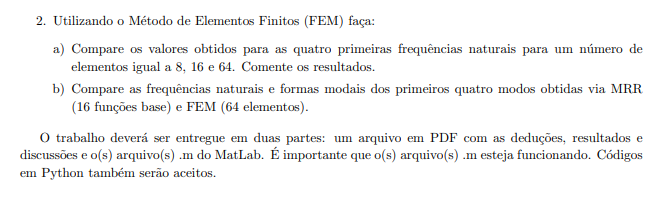